## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

#### Solution
Let's define two Random Variables defined in this way:
$X$ is 1 if the subject has a coronavirus, 0 if the subject doesn't. $Y$ is 1 if the subject was tested positive, 0 if he/she was tested negative.
Then we can rewrite the given data as the following:

"This test gives a false positive $3\%$ of the time" : $p(y=1|x=1) = 97\%$

"This test gives a false negative $2\%$ of the time" : $p(y=0|x=0) = 98\%$

"One half percent of the population has a coronavirus" : $p(x=1) = 0.5\%$

Then, to find the probability that Luca is positive to the test we just need to calculate $p(y=1)$, which we can compute marginalizing over X. That is $p(y=1) = \sum_X p(x,y=1) = \sum_X p(y=1|x) p(x) = p(y=1|x=1)p(x=1) + p(y=1|x=0)p(x=0) \approx 8\%$

Supposing that Luca is positive to the test, the probability that he has contracted the disease is calculated using Bayes' Theorem.
In fact $p(x=1|y=1) = \frac{p(y=1|x=1) p(x=1)}{p(y=1)} \approx 6\%$

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x=1)$.

0.8425

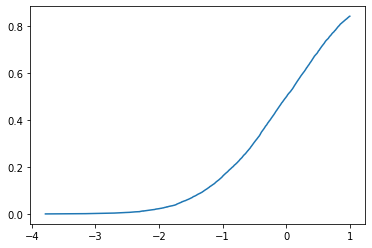

In [2]:
import pyro.distributions
import matplotlib.pyplot as plt
import numpy as np

def cdf(dist, x):
    samples = [pyro.sample("n", dist) for i in range(10000)] 
    sorted_samples = np.sort(samples)
    n = sorted_samples.size
    idx_less_than_x = np.argwhere(sorted_samples <= x)
    x_idx = max(idx_less_than_x)[0]
    sorted_samples = sorted_samples[0:x_idx]
    y = np.arange(1,n+1)/n
    plt.plot(sorted_samples,y[0:x_idx])
    return y[x_idx]
    
test_distrib = pyro.distributions.Normal(0,1)
cdf(test_distrib,1)

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

0.948

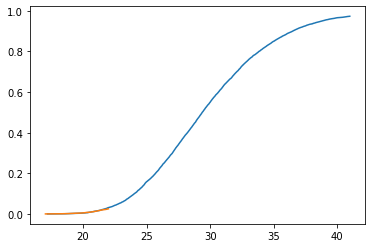

In [3]:
#1.
sigma_2 = pyro.distributions.InverseGamma(38,1110)
diff = cdf(sigma_2,41) - cdf(sigma_2,22) #The probability corresponds to the difference in value of the cdf evaluated in 41 and 22
diff

#### 2.
The posterior density of an Inverse gamma with a likelihood distributed as a Normal with known mean value (as is our case) is still an Inverse Gamma with parameters $$\alpha = \alpha+\frac{n}{2}$$$$\beta = \beta+\frac{\sum_{i=1}^n (x_i-\mu)^2}{2}$$ as we can see from the 02_probabilistic_programming notebook

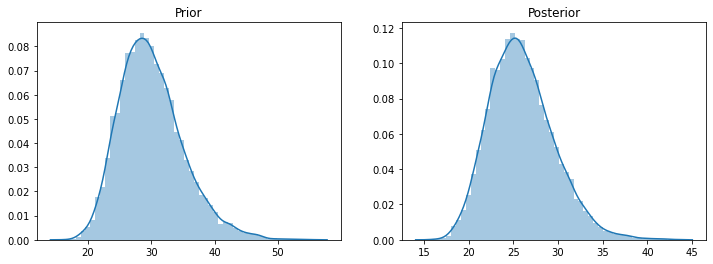

alfa:  54
beta:  1380.0


In [4]:
import pyro.distributions as dist
import seaborn as sns

data = [183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186]
alfa = 38 + len(data) #new alfa

num = 0
for i in data:
    num += (i-180)**2
beta = 1110 + num/2 #new beta

prior_sigma_samples = [pyro.sample("prior", dist.InverseGamma(38,1110)) for i in range(10000)]
post_sigma_samples = [pyro.sample("post", dist.InverseGamma(alfa,beta)) for i in range(10000)]

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(prior_sigma_samples, ax=axes[0])
sns.distplot(post_sigma_samples, ax=axes[1])
axes[0].set_title('Prior')
axes[1].set_title('Posterior')
plt.show()
print("alfa: ", alfa)
print("beta: ", beta)

#### 3.

In order to find the posterior density of $\sigma$ we will focus on the posterior density for $\sigma^2$, which we already calculated and is equal to 

$$f(\sigma^2) = \frac{\beta^\alpha}{\Gamma(\alpha)}\frac{1}{\sigma^{2(\alpha +1)}}e^{-\frac{\beta}{\sigma^2}}$$

We know from the theory that the p.d.f of $Y$ such that $Y=g(X)$ is

$$f_y(y) = f_x(g^{-1}(y)) \left|\frac{dg^{-1}(y)}{dy}\right| $$

<div align="center" style="color:darkblue">S. Wood, "Core Statistics", pag. 12</div>

Then, since we are looking for the distribution of $\sigma$, knowing the distribution of $\sigma^2$, we are basically interested in finding the distribution of $Y=\sqrt(X)$ given $X$. Since our original $X > 0$, we can invert the function and have $X=Y^2$ with the same support of $X$. Then, the p.d.f. of $Y$ becomes

$$f_y(y) = \frac{\beta^\alpha}{\Gamma(\alpha)}\frac{1}{y^{2(\alpha +1)}}e^{-\frac{\beta}{y^2}} 2y $$
$$f_\sigma(\sigma) = \frac{\beta^\alpha}{\Gamma(\alpha)}\frac{1}{\sigma^{2\alpha + 1}}e^{-\frac{\beta}{\sigma^2}} $$

where again
$$\alpha = \alpha+\frac{n}{2} = 54$$
$$\beta = \beta+\frac{\sum_{i=1}^n (x_i-\mu)^2}{2} = 1380$$


### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

#### Solution

The Gamma distribution is defined as 
$$ \Gamma(\theta;\alpha, \beta) = \frac{\beta^\alpha \theta^{\alpha-1}e^{-\beta\theta}}{\Gamma(\alpha)}$$

The exponential distribution is 
$$ Exp(x;\theta) = \theta e^{-\theta x} $$

Under the assumption of i.i.d X the likelihood becomes
$$Likelihood = \prod_{i=1}^n \theta e^{-\theta x_i} = \theta^n e^{- \theta \sum_{i=1}^n x_i} $$

Then we will have (we can forget about the marginalization costant because we are interested in proving only if it exists a conjugate prior relation in between the Exponential Likelihood and the Gamma Distribution)

$$Posterior \propto Likelihood \times Prior = \frac{\beta^\alpha \theta^{\alpha-1}e^{-\beta\theta}}{\Gamma(\alpha)} \theta^n e^{- \theta \sum_{i=1}^n x_i} = \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha +n -1} e^{-(\beta + \sum_{i=1}^n x_i)}  $$

Which is again a Gamma distribution with

$$\alpha = \alpha+n$$
$$\beta = \beta+\sum_{i=1}^n x_i$$